# Machine Learning for Nickel Catalyzed Borylation in EtOH

In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math as math
import matplotlib.pyplot as plt

from sklearn.svm import SVR

### Load Preprocessed Ethanol Dataset

In [2]:
dataset = pd.read_csv("./data/data_EtOH_Final.csv")
dataset.head()

,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,50.731606,50.731606,351.19888,1.840787,-0.055960,A-paPhos,InChI=1S/C20H20NP/c1-21(2)17-13-15-20(16-14-17...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,80.673770,61.935337,479.46484,1.803143,-0.058457,CX-FBu,InChI=1S/C29H39P.BF4/c1-2-3-22-29(27-20-12-10-...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,107.755370,56.694310,386.44120,1.805810,-0.058387,CX-PCy,InChI=1S/C22H30NP/c1-4-11-19(12-5-1)23-18-10-1...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,117.597336,54.091050,618.03375,1.817123,-0.054418,Cy-BippyPhos,InChI=1S/C36H39N4P/c1-6-16-28(17-7-1)34-36(35(...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,111.484024,57.033180,402.37967,1.816461,-0.061351,Cy-JohnPhos,InChI=1S/C24H31P/c1-4-12-20(13-5-1)23-18-10-11...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",80.44


In [3]:
dataset.Ligand.unique().tolist()

['A-paPhos',
 'CX-FBu',
 'CX-PCy',
 'Cy-BippyPhos',
 'Cy-JohnPhos',
 'Cy-PhenCar-Phos',
 'Cy-vBRIDP',
 'Kwong',
 'MePhos',
 'PCy3 HBF4',
 'Ph-DavePhos',
 'Ph-SPhos',
 'Ph-XPhos',
 'PMe3 HBF4',
 'PnBu3 HBF4',
 'P(o-Anis)3',
 'P(p-Anis)3',
 'P(p-F-Ph)3',
 'PPh2Cy',
 'PPh3',
 'PPhtBu2',
 'PXy3',
 'VPhos']

In [4]:
#load external ligand dataset in EtOH
ex_dataset = pd.read_csv("./data/external_ligand_data_EtOH.csv")
ex_dataset.head()

,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,117.552360,56.790530,430.68256,1.797235,-0.062511,Cy-JohnPhos-OMe,InChI=1S/C25H33OP/c1-26-24-18-10-8-16-22(24)23...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",80.58
1,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,124.748184,58.538240,497.10650,1.784157,-0.063670,CPhos,InChI=1S/C28H41N2P/c1-29(2)25-19-13-20-26(30(3...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",67.06
2,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,109.966415,55.457000,415.06253,1.801754,-0.061979,CX-POMeCy,InChI=1S/C23H32NOP/c1-25-22-16-9-8-15-21(22)24...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",78.86
3,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,49.582157,43.828636,151.64550,1.826696,-0.062157,PEt3,"InChI=1S/C6H15P/c1-4-7(5-2)6-3/h4-6H2,1-3H3",InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",8.66
4,1.09,129.449,0.124,7.356,0.004,120.935,118.065,-0.177,-0.341,13.589,...,54.862930,51.901974,330.64270,1.833448,-0.054343,PPh2(o-Anis),InChI=1S/C19H17OP/c1-20-18-14-8-9-15-19(18)21(...,InChI=1S/C8H7BO3/c10-9(11)7-1-2-8-6(5-7)3-4-12...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",79.61


In [5]:
ex_dataset.Ligand.unique().tolist()

['Cy-JohnPhos-OMe',
 'CPhos',
 'CX-POMeCy',
 'PEt3',
 'PPh2(o-Anis)',
 'RuPhos',
 'P(p-CF3-Ph)3',
 'CM-Phos',
 'PBn3',
 'CX-PInCy',
 'S-Phos',
 'PPhCy2']

In [6]:
#Training set
ML_data_traintest = dataset
ML_data_traintest2 = ML_data_traintest.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)
print (ML_data_traintest2.shape)
ML_data_traintest2.head()

(779, 157)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960,87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457,6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387,71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418,64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,44.561430,72.197180,0.212085,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351,80.44


In [7]:
X_train=ML_data_traintest2.drop(columns=['Yield'])
Y_train=ML_data_traintest2['Yield']

### SVM

In [8]:
%%time
steps = [('scaler', StandardScaler()), ('model', SVR())]
pipeline = Pipeline(steps)
parameters = {'model__C': [0.1, 1, 10, 100], 
              'model__gamma': [1,0.1,0.01,0.001],
              'model__kernel': ['rbf', 'poly', 'sigmoid']}

svm_search = GridSearchCV(pipeline, 
                         parameters, 
                         cv = 5, 
                         scoring="neg_mean_squared_error", 
                         verbose=3)

svm_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.1s
[CV 2/5] END model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.1s
[CV 3/5] END model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.1s
[CV 4/5] END model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.1s
[CV 5/5] END model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.1s
[CV 1/5] END model__C=0.1, model__gamma=1, model__kernel=poly; total time=   4.0s
[CV 2/5] END model__C=0.1, model__gamma=1, model__kernel=poly; total time=   1.2s
[CV 3/5] END model__C=0.1, model__gamma=1, model__kernel=poly; total time=   1.7s
[CV 4/5] END model__C=0.1, model__gamma=1, model__kernel=poly; total time=   2.5s
[CV 5/5] END model__C=0.1, model__gamma=1, model__kernel=poly; total time=   2.6s
[CV 1/5] END model__C=0.1, model__gamma=1, model__kernel=sigmoid; total time=   0.1s
[CV 2/5] END model__C=0.1, model__gamm

[CV 5/5] END model__C=1, model__gamma=0.01, model__kernel=poly; total time=   0.0s
[CV 1/5] END model__C=1, model__gamma=0.01, model__kernel=sigmoid; total time=   0.1s
[CV 2/5] END model__C=1, model__gamma=0.01, model__kernel=sigmoid; total time=   0.1s
[CV 3/5] END model__C=1, model__gamma=0.01, model__kernel=sigmoid; total time=   0.1s
[CV 4/5] END model__C=1, model__gamma=0.01, model__kernel=sigmoid; total time=   0.1s
[CV 5/5] END model__C=1, model__gamma=0.01, model__kernel=sigmoid; total time=   0.1s
[CV 1/5] END model__C=1, model__gamma=0.001, model__kernel=rbf; total time=   0.1s
[CV 2/5] END model__C=1, model__gamma=0.001, model__kernel=rbf; total time=   0.1s
[CV 3/5] END model__C=1, model__gamma=0.001, model__kernel=rbf; total time=   0.1s
[CV 4/5] END model__C=1, model__gamma=0.001, model__kernel=rbf; total time=   0.1s
[CV 5/5] END model__C=1, model__gamma=0.001, model__kernel=rbf; total time=   0.1s
[CV 1/5] END model__C=1, model__gamma=0.001, model__kernel=poly; total t

[CV 5/5] END model__C=100, model__gamma=0.1, model__kernel=rbf; total time=   0.1s
[CV 1/5] END model__C=100, model__gamma=0.1, model__kernel=poly; total time=   2.2s
[CV 2/5] END model__C=100, model__gamma=0.1, model__kernel=poly; total time=   1.2s
[CV 3/5] END model__C=100, model__gamma=0.1, model__kernel=poly; total time=   1.7s
[CV 4/5] END model__C=100, model__gamma=0.1, model__kernel=poly; total time=   2.2s
[CV 5/5] END model__C=100, model__gamma=0.1, model__kernel=poly; total time=   2.6s
[CV 1/5] END model__C=100, model__gamma=0.1, model__kernel=sigmoid; total time=   0.1s
[CV 2/5] END model__C=100, model__gamma=0.1, model__kernel=sigmoid; total time=   0.1s
[CV 3/5] END model__C=100, model__gamma=0.1, model__kernel=sigmoid; total time=   0.1s
[CV 4/5] END model__C=100, model__gamma=0.1, model__kernel=sigmoid; total time=   0.1s
[CV 5/5] END model__C=100, model__gamma=0.1, model__kernel=sigmoid; total time=   0.1s
[CV 1/5] END model__C=100, model__gamma=0.01, model__kernel=rb

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': [1, 0.1, 0.01, 0.001],
                         'model__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [9]:
svm_search.best_params_

{'model__C': 10, 'model__gamma': 0.01, 'model__kernel': 'rbf'}

In [10]:
svm_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(C=10, gamma=0.01))])

### External Ligand set Evaluation¶

In [11]:
ext_y=ex_dataset['Yield']
ext_X=ex_dataset.iloc[:, ex_dataset.columns.isin(X_train.columns)]
Y_Pred = svm_search.best_estimator_.predict(ext_X)

In [12]:
mse = mean_squared_error(ext_y, Y_Pred)
print(math.sqrt(mse))

24.185005835959238


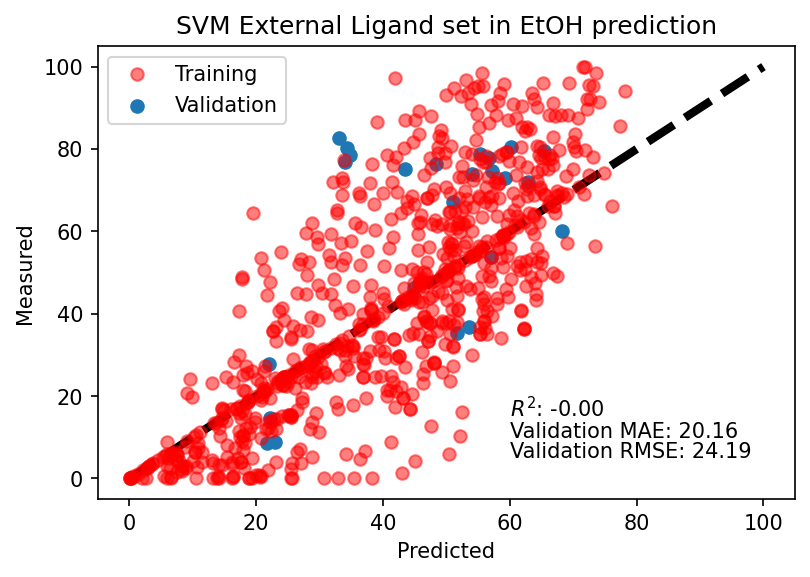

In [13]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(Y_Pred,ext_y,label="Validation")
ax.plot( [0,100],[0,100], 'k--', lw=4)
ax.plot(svm_search.best_estimator_.predict(X_train), Y_train, "or", alpha=0.5, label="Training")
ax.text(60,15,r'$R^2$: {:0.2f}'.format(r2_score(ext_y,Y_Pred)))
ax.text(60,10,'Validation MAE: {:0.2f}'.format(mean_absolute_error(Y_Pred,ext_y)))
ax.text(60,5,'Validation RMSE: {:0.2f}'.format(np.sqrt(mean_squared_error(Y_Pred,ext_y))))
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
ax.set_title('SVM External Ligand set in EtOH prediction')
plt.legend()
plt.show()

In [14]:
results=ex_dataset[['Electrophile','Ligand','Yield']]
results.reset_index(drop=True, inplace=True)
results['Pred_Yield']=Y_Pred
results.to_csv("results/SVM_EtOH_Ligand_prediction.csv",index=False)

<ipython-input-14-23307de7fcda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Pred_Yield']=Y_Pred


In [15]:
results

,Electrophile,Ligand,Yield,Pred_Yield
0,5-Bromobenzofuran,Cy-JohnPhos-OMe,80.58,60.228043
1,5-Bromobenzofuran,CPhos,67.06,51.071432
2,5-Bromobenzofuran,CX-POMeCy,78.86,55.250386
3,5-Bromobenzofuran,PEt3,8.66,21.687023
4,5-Bromobenzofuran,PPh2(o-Anis),79.61,65.400772
5,5-Bromobenzofuran,RuPhos,75.21,43.423517
6,5-Bromobenzofuran,P(p-CF3-Ph)3,80.15,34.331716
7,5-Bromobenzofuran,CM-Phos,82.63,32.989762
8,5-Bromobenzofuran,PBn3,27.75,21.962056
9,5-Bromobenzofuran,CX-PInCy,77.80,56.774469


<AxesSubplot:ylabel='feature'>

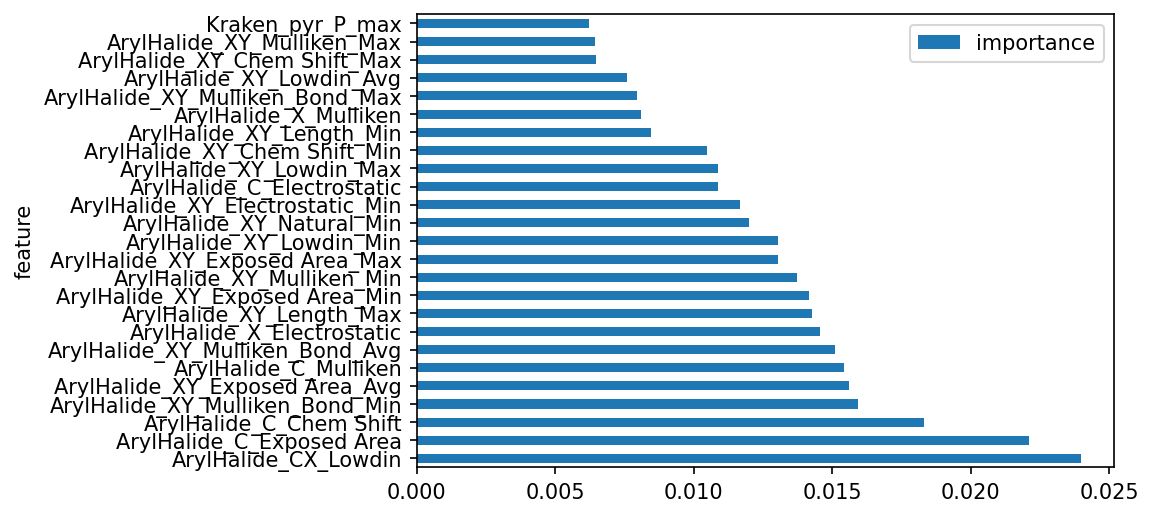

In [16]:
#For rbf importance using permuation importance
from sklearn.inspection import permutation_importance

features=np.array(X_train.columns)
perm_importance = permutation_importance(svm_search.best_estimator_, X_train, Y_train)
sorted_idx = perm_importance.importances_mean.argsort()

df=pd.DataFrame(list(zip(X_train.columns[sorted_idx], 
                      perm_importance.importances_mean[sorted_idx])))
df2 = df.sort_values(by=[1], ascending=False).head(25)
df2.columns = ['feature', 'importance']
df2.set_index('feature',inplace=True)
df2.plot(kind='barh')

In [17]:
%load_ext watermark

In [18]:
%watermark --iversions

numpy     : 1.19.2
pandas    : 1.2.0
sklearn   : 0.0
matplotlib: 3.3.3

